# A simple explaination of Linear Regression

## Cost function
In supervised algorithm, our goal is, given a training set, to learn a function, names **hypothesis**, $h(x) : X \rightarrow Y$ that is able to make a prediction from the input $x$ for the corresponding value of y $(\hat{y})$.

We can measure the accuracy of our hypothesis function by using a **cost function** (loss function). A cost function , is square difference between the predicted $\hat{y}$ and the actual $y$:

$L(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i = 1}^{m} {(h(x_{i}) - y_{i})}^2 = \frac{1}{2m}\sum_{i = 1}^{m} {(\hat{y}_{i} - y_{i})}^2$

And in all problem so far, the disire of making a model with high accuracy comes parabell with the problem of how to minimize the **cost function**, therefore, we are looking for a set value of $(\theta_0, \theta_1)$ where the cost function is minimum.

*Target minimize cost function* <=> $\underset{\theta_0,\theta_1}{\mathrm{argmin}} L(\theta_0, \theta_1)$

*Fun notes*: "Squared error function", or "Mean squared error" is either names for **Cost function**

In simple problem, where the training set has only 1 feature, the **hypothesis** can be defined as:
$h(x) = \theta_{0} + \theta_{1}x$

If we try to think of it in visual terms, our training data set is scattered on the x-y plane. We think that hypothesis is a *strange line* (but only in this simple-1-feature training set) which passes through these scattered data points.
![visual-hypothesis](images/Figure_2.png)

With a different set of $(\theta_0, \theta_1)$, we get a different **hypothesis** function and different value of the **cost function**, which can be better or not. Look at this contour figure represent our cost function, we get different strange line (defined by hypothesis) and it can be represent by a individual point in contour figure:
![loss-function-contour-plot](images/loss_function_contour_plot.png)


# Gradient Decent
Imagine if we graph our hypothesis with $\theta_0$ on the x-axis, $\theta_1$ on the y-axis and z-axis represents our loss/cost function value, we will get a 3d figure like below:

![gradient-decents](images/gradient_decents.png)

We all know that our target is to minimize the **cost function**, we will success when our cost function reach the blue zone in the figure above and the $(\theta_0, \theta_1)$ is what we are looking for optimize our predictor.

How can we get our loss function there? **By using derivative properties!**

Andrew Ng in Machine learning course at Standford once said: 

"By taking the derivative (the tangential line to a function) of our cost function. The slope of the tangent is the derivative at that point and it will give us a direction to move towards. We make steps down the cost function in the direction with the steepest descent. The size of each step is determined by the parameter $\alpha$, which is called the learning rate."

Therefore, to update our hypothesis, we iterate through all point in the training set and update the $\theta_0$ and $\theta_1$.

*repeat until convergence:*
$\theta_i := \theta_i - \alpha \frac{\partial}{\partial\theta_i} J(\theta_0, \theta_1)$

where $i=0,1$ represents the feature index number

The algorithm above is called as **batch gradient decent**, we also have **mini-batch** and **stochastic** gradient decent.
- **Batch gradient decent**

- **Mini-batch gradient decent**

- **Stochastic gradient decent**

*Note* the explain of 3 thing will explain later.

In [5]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
x = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T

Text(0, 0.5, 'Weight (kg)')

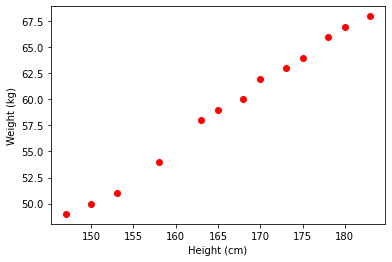

In [6]:
plt.plot(x, y, "ro")
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')

In [7]:
# X bar = [1, x_1, x_2]
addition_one = np.ones((x.shape[0], 1))
x_bar = np.concatenate((addition_one, x), axis = 1)

In [8]:
# Solve loss function by derivation = 0
A = np.dot(x_bar.T, x_bar)
b = np.dot(x_bar.T, y)
w = np.dot(np.linalg.pinv(A), b) # pinv is pseudo inverse (gia nghich)
print('w = ', w)

w =  [[-33.73541021]
 [  0.55920496]]


In [9]:
# Draw the fitting line
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185)
print('x0 = ', x0)
y0 = w_1*x0 + w_0
print('y0 =', y0)

x0 =  [145.         145.81632653 146.63265306 147.44897959 148.26530612
 149.08163265 149.89795918 150.71428571 151.53061224 152.34693878
 153.16326531 153.97959184 154.79591837 155.6122449  156.42857143
 157.24489796 158.06122449 158.87755102 159.69387755 160.51020408
 161.32653061 162.14285714 162.95918367 163.7755102  164.59183673
 165.40816327 166.2244898  167.04081633 167.85714286 168.67346939
 169.48979592 170.30612245 171.12244898 171.93877551 172.75510204
 173.57142857 174.3877551  175.20408163 176.02040816 176.83673469
 177.65306122 178.46938776 179.28571429 180.10204082 180.91836735
 181.73469388 182.55102041 183.36734694 184.18367347 185.        ]
y0 = [47.34930928 47.80580312 48.26229697 48.71879081 49.17528466 49.63177851
 50.08827235 50.5447662  51.00126005 51.45775389 51.91424774 52.37074159
 52.82723543 53.28372928 53.74022313 54.19671697 54.65321082 55.10970467
 55.56619851 56.02269236 56.47918621 56.93568005 57.3921739  57.84866774
 58.30516159 58.76165544 59.21814928

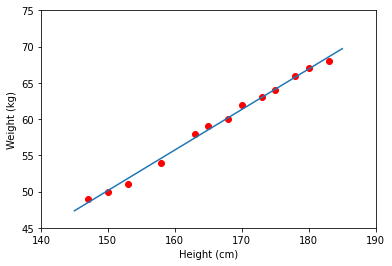

In [10]:
# Visualize data 
plt.plot(x, y, 'ro')
plt.plot(x0, y0)
plt.axis((140, 190, 45, 75))
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show(block=True)
